In [1]:
from IPython.core.display import display_html
from urllib.request import urlopen

display_html(urlopen('http://bit.ly/1HflmO9').read(), raw=True)

# Análisis de estabilidad para sistema bajo realimentación integral

## Ejemplo 1

Dado el sistema:

$$
\dot{x}(t) = A x(t) + B u(t - h)
$$

con la ley de control:

$$
u(t) = k \left[ x(t) + \int_{-h}^0 e^{-A(\theta + h)} B u(t + \theta) d\theta \right]
$$

por lo que el sistema en lazo cerrado es:

$$
\dot{x}(t) = \left( A + e^{-Ah} B K \right) x(t)
$$

el sistema para el que haremos este desarrollo es:

$$
\dot{x}(t) =
\begin{pmatrix}
0 & 0 \\
1 & 1
\end{pmatrix} x(t) +
\begin{pmatrix}
1 \\
0
\end{pmatrix} u(t - h)
$$

con $h = 1$.

In [2]:
from sympy import var, sin, cos, Matrix, Integer, eye, Function, Rational, exp, Symbol, I, solve
from sympy.physics.mechanics import mechanics_printing
mechanics_printing()

In [3]:
var("t h θ s ω")

Para analizar la estabilidad del sistema bajo realimentación, utilizamos:

$$
\dot{x}(t) = \left( A + e^{-Ah} B K \right) x(t)
$$

por lo que la función de transferencia del sistema realimentado será:

$$
\det{\left( sI - A - e^{-Ah} B K \right)}
$$

In [4]:
A1 = Matrix([[0, 0], [1, 1]])
B1 = Matrix([[1], [0]])
K1 = Matrix([[1 - 4*exp(h), -4*exp(h)]])

In [5]:
(s*eye(2) - A1 - exp(-A1*h)*B1*K1).det()

Por lo que observamos que esta realimentación coloca dos polos en $-1$, sin embargo queremos analizar la estabilidad bajo los parametros que establecimos, por lo que notamos que este polinomio puede ser escrito como:

$$
s^2 - \left( 1 + \alpha_1 + \alpha_2 \right)s + \alpha_1
$$

In [6]:
α1, α2 = K1[0] - K1[1], exp(-h)*K1[1]
α1, α2

In [7]:
s**2 - (1 + α1 + α2)*s + α1

Este polinomio caracteristico esta libre de retardos, por lo que podemos analizarlo con Routh-Hurwitz y obtener las siguientes condiciones:

$$
\begin{align}
\alpha_1 &> 0 \\
\alpha_1 &< -1 - \alpha_2
\end{align}
$$

Por otro lado, si hacemos un analisis de D-particiones, al sustituir $s = 0$ y $s = j \omega$ obtenemos que:

$$
\begin{align}
\alpha_1 &= 0 \\
\alpha_1 &= -1 - \alpha_2
\end{align}
$$

In [8]:
var("α_1 α_2 ω")

In [9]:
(s**2 - (1 + α_1 + α_2)*s + α_1).subs(s, 0)

In [10]:
(s**2 - (1 + α_1 + α_2)*s + α_1).subs(s, 1j*ω).coeff(-1j*ω)

Lo cual es consistente con los resultados de Routh-Hurwitz. Al graficar estas curvas limite de las D-particiones, obtenemos:

In [11]:
from numpy import linspace, zeros, concatenate, column_stack

In [12]:
%matplotlib inline
from matplotlib.pyplot import plot, style, figure, legend, fill, Polygon
style.use("ggplot")

In [13]:
x = linspace(-4, -1, 100)
alpha1 = linspace(-4, 4, 100)
alpha2 = -alpha1 - 1

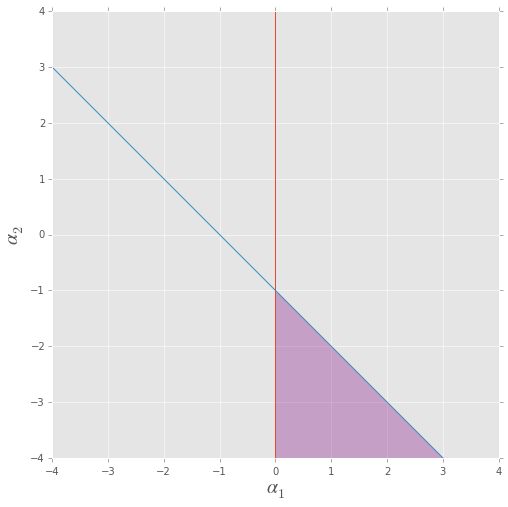

In [14]:
f = figure(figsize=(8, 8))
plot(zeros(len(alpha1)), alpha1)
plot(alpha1, alpha2)

ax = f.gca()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

ax.fill_betweenx(alpha2, 0, alpha1, where=alpha1>0, alpha=0.3, facecolor='purple')

ax.set_xlabel(r"$α_1$", fontsize=20)
ax.set_ylabel(r"$α_2$", fontsize=20);

Por otro lado, para nalizar la estabilidad del controlador empezamos calculando $e^{-A (\theta + h)}$:

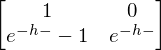

In [15]:
exp(-A1*(θ+ h))

Sustituyendo $A$, $B$ y $e^{-A(\theta + h)}$ en $u(t)$, tenemos:

$$
\begin{align}
u(t) &=
\begin{pmatrix}
k_1 & k_2
\end{pmatrix} x(t) +
\begin{pmatrix}
k_1 & k_2
\end{pmatrix}
\int_{-h}^0 e^{-A(\theta + h)} B u(t + \theta) d\theta \\
&=
\begin{pmatrix}
k_1 & k_2
\end{pmatrix} x(t) +
\begin{pmatrix}
k_1 & k_2
\end{pmatrix}
\int_{-h}^0
\begin{pmatrix}
1 & 0 \\
e^{-(\theta + h)} - 1 & e^{-(\theta + h)}
\end{pmatrix}
\begin{pmatrix}
1 \\
0
\end{pmatrix}
u(t + \theta) d\theta \\
&=
\begin{pmatrix}
k_1 & k_2
\end{pmatrix} x(t) +
\begin{pmatrix}
k_1 & k_2
\end{pmatrix}
\int_{-h}^0
\begin{pmatrix}
1 \\
e^{-(\theta + h)} - 1
\end{pmatrix}
u(t + \theta) d\theta
\end{align}
$$

Sustituyendo $k_1 = 1 - 4 e^h$ y $k_2 = -4e^h$ tenemos:

$$
u(t)=
\begin{pmatrix}
1 - 4 e^h & -4e^h
\end{pmatrix} x(t) +
\begin{pmatrix}
1 - 4 e^h & -4e^h
\end{pmatrix}
\int_{-h}^0
\begin{pmatrix}
1 \\
e^{-(\theta + h)} - 1
\end{pmatrix}
u(t + \theta) d\theta
$$

y podemos meter estas ganancias a la integral, para obtener:

$$
\begin{align}
u(t) &=
\begin{pmatrix}
1 - 4 e^h & -4e^h
\end{pmatrix} x(t) +
\int_{-h}^0
\left( 1 - 4e^{-\theta} \right)
u(t + \theta) d\theta \\
&=
\begin{pmatrix}
1 - 4 e^h & -4e^h
\end{pmatrix} x(t) +
\int_{-h}^0 u(t + \theta) d\theta -
\int_{-h}^0 4e^{-\theta} u(t + \theta) d\theta
\end{align}
$$

In [16]:
(K1*exp(-A1*(θ + h))*B1)[0].simplify()

In [17]:
x1 = Function("x1")(t)
x2 = Function("x2")(t)

X = Matrix([[x1], [x2]])

u = Function("u")(t + θ)

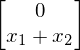

In [18]:
A1*X

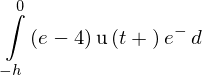

In [19]:
((K1*exp(-A1*(θ + h))*B1)[0].simplify()*u).integrate((θ, -h, 0))

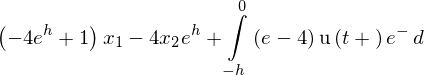

In [20]:
(K1*X)[0] + ((K1*exp(-A1*(θ + h))*B1)[0].simplify()*u).integrate((θ, -h, 0))

Si aplicamos la transformada de Laplace a esto, obtendremos:

$$
\begin{align}
u(t) - \int_{-h}^0 u(t + \theta) d\theta + \int_{-h}^0 4e^{-\theta} u(t + \theta) d\theta &=
(1 - 4 e^h) x_1(t) - 4e^h x_2(t) \\
\left[ 1 - \frac{1 - e^{-hs}}{s} + 4 \frac{1 - e^{-h(s-1)}}{s-1} \right] u(s) &=
(1 - 4 e^h) x_1(s) - 4e^h x_2(s)
\end{align}
$$

Por lo que el polinomio caracteristico del controlador del sistema es:

$$
1 - \frac{1 - e^{-hs}}{s} + 4\frac{1 - e^{-h(s-1)}}{s-1} = 0
$$

Si ahora introducimos los parametros $\alpha_1 = k_1 - k_2 = 1$ y $\alpha_2 = e^{-h} k_2 = -4$, este polinomio caracteristico queda de la forma:

$$
1 - \alpha_1 \frac{1 - e^{-hs}}{s} - \alpha_2 \frac{1 - e^{-h(s-1)}}{s-1} = 0
$$

Sustituyendo $s = j \omega$, tendremos:

$$
- \alpha_{1} \left(- ω \operatorname{sin}\left(h ω\right) + \operatorname{cos}\left(h ω\right) - 1\right) + \alpha_{2} ω e^{h} \operatorname{sin}\left(h ω\right) - ω^{2} + j \left( - \alpha_{1} \left(- ω \operatorname{cos}\left(h ω\right) + ω - \operatorname{sin}\left(h ω\right)\right) - \alpha_{2} ω \left(- e^{h} \operatorname{cos}\left(h ω\right) + 1\right) - ω \right) = 0
$$

In [45]:
h = Symbol("h", real=True, imag=False)
ω = Symbol("ω", real=True, imag=False)
α_1 = Symbol("α_1", real=True, imag=False)
α_2 = Symbol("α_2", real=True, imag=False)

In [52]:
r, i = (s**2 - s - α_1*(s - 1)*(1 - exp(-h*s)) - α_2*s*(1 - exp(-h*(s - 1)))).subs(s, I*ω).as_real_imag()
r + i*I

In [47]:
r

In [48]:
i

Por lo que al separar en parte real e imaginaria, obtenemos dos expresiones de donde se puede obtener $\alpha_1$ y $\alpha_2$, en terminos de $\omega$:

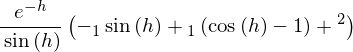

In [49]:
al2 = solve(r, α_2)[0]
al2

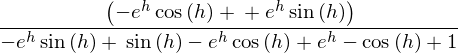

In [50]:
al1 = solve(i.subs(α_2, al2), α_1)[0]
al1

Creando funciones parametricas para estos valores, podemos graficar las D-particiones del controlador:

In [27]:
def par1(ω, h):
    from numpy import sin, cos, exp
    num = ω*(ω*cos(ω*h)*exp(h) - ω - sin(ω*h)*exp(h))
    den = ω*sin(ω*h)*(exp(h) - 1) + (cos(ω*h) - 1)*(exp(h) + 1)
    return num/den
    
def par2(α1, ω, h):
    from numpy import sin, cos, exp
    num = ω**2 - α1*(ω*sin(ω*h) - cos(ω*h) + 1)
    den = ω*sin(ω*h)*exp(h)
    return num/den

In [28]:
from numpy import pi
τ = 2*pi # o mas bien π = 1/2 τ
ɛ = 0.0001

In [29]:
oms = linspace(ɛ, τ - ɛ, 1.0/ɛ)
alpha_1_1 = [par1(om, 1.0) for om in oms]
alpha_2_1 = [par2(alpha1, om, 1.0) for om, alpha1 in zip(oms, alpha_1_1)]

oms = linspace(τ + ɛ, 1.3*τ - ɛ, 0.3/ɛ)
alpha_1_2 = [par1(om, 1.0) for om in oms]
alpha_2_2 = [par2(alpha1, om, 1.0) for om, alpha1 in zip(oms, alpha_1_2)]

al1 = concatenate((alpha_1_1[::-1], alpha_1_2))
al2 = concatenate((alpha_2_1[::-1], alpha_2_2))

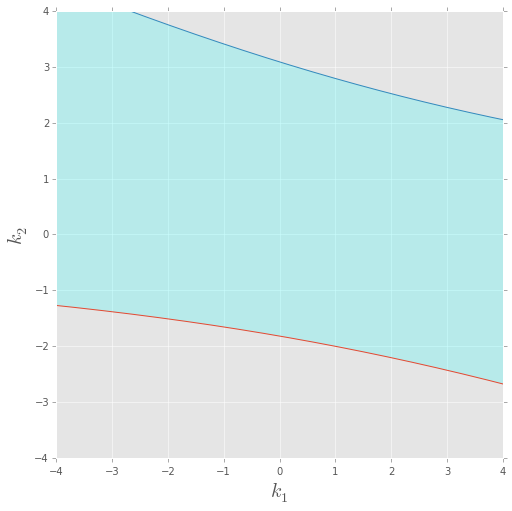

In [30]:
f = figure(figsize=(8, 8))
plot(alpha_1_1, alpha_2_1)
plot(alpha_1_2, alpha_2_2)

ax = f.gca()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

p = Polygon(column_stack((al1, al2)), facecolor='cyan', alpha=0.2, edgecolor='none')

ax.add_artist(p)

ax.set_xlabel(r"$k_1$", fontsize=20)
ax.set_ylabel(r"$k_2$", fontsize=20);

En donde el punto $(\alpha_1, \alpha_2) = (0, 0)$ es trivialmente estable por Routh - Hurwitz, por lo que podemos considerar la region central de esta gráfica, como estable. Si ahora juntamos las dos gráficas de D-particiones, obtenemos:

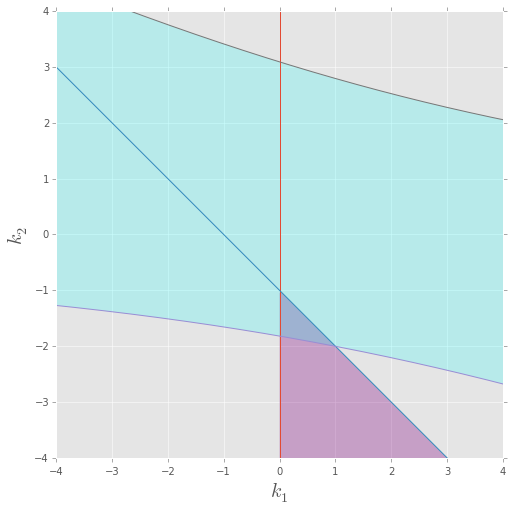

In [31]:
f = figure(figsize=(8, 8))

plot(zeros(len(alpha1)), alpha1)
plot(alpha1, alpha2)

plot(alpha_1_1, alpha_2_1)
plot(alpha_1_2, alpha_2_2)

ax = f.gca()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

ax.fill_betweenx(alpha2, 0, alpha1, where=alpha1>0, alpha=0.3, facecolor='purple')
p = Polygon(column_stack((al1, al2)), facecolor='cyan', alpha=0.2, edgecolor='none')
ax.add_artist(p)

ax.set_xlabel(r"$k_1$", fontsize=20)
ax.set_ylabel(r"$k_2$", fontsize=20);

Y el sistema bajo realimentación será estable, siempre y cuando escojamos una realimentación dentro de las dos regiones de estabilidad.

## Ejemplo 2

Para el sistema:

$$
\dot{x}(t) =
\begin{pmatrix}
0 & 1 \\
0 & 0
\end{pmatrix}
x(t) +
\begin{pmatrix}
0 \\
1
\end{pmatrix}
u(t - h)
$$

con $h = 1$.

In [32]:
var("k1 k2")

In [33]:
A2 = Matrix([[0, 1], [0, 0]])
B2 = Matrix([[0], [1]])
K2 = Matrix([[k1, k2]])

Tiene un polinomio caracteristico:

In [34]:
((s*eye(2) - A2 - exp(-A2*h)*B2*K2).det()).collect(s)

o bien:

$$
s^2 +  \left( h k_1 - k_2 \right) s - k_1
$$

Al cual podemos aplicar el criterio de estabilidad de Routh-Hurwitz y obtener:

$$
\begin{align}
k_1 &< 0 \\
k_2 &< h k_1
\end{align}
$$

Por lo que la gráfica de D-particiones se verá:

In [35]:
h = 1
x = linspace(-4, -1, 100)
K_1 = linspace(-4, 4, 100)
K_2 = h*K_1

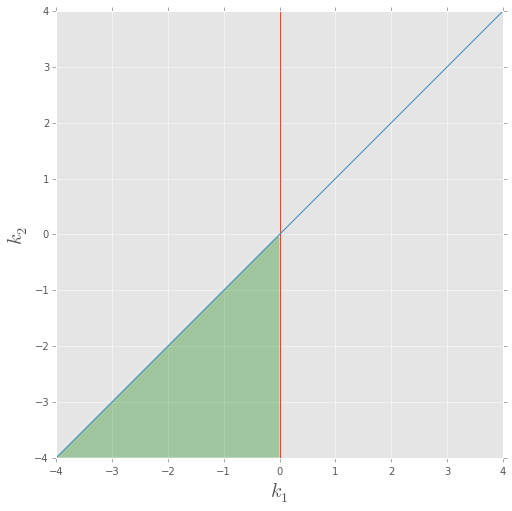

In [36]:
f = figure(figsize=(8, 8))
plot(zeros(len(K_1)), K_1)
plot(K_1, K_2)

ax = f.gca()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

ax.fill_betweenx(K_2, 0, K_1, where=K_1<0, alpha=0.3, facecolor='green')

ax.set_xlabel(r"$k_1$", fontsize=20)
ax.set_ylabel(r"$k_2$", fontsize=20);

Por otro lado, para analizar el comportamiento del controlador, sustituimos los datos en la ecuación del controlador:

$$
\begin{align}
u(t) &=
\begin{pmatrix}
k_1 & k_2
\end{pmatrix} x(t) +
\begin{pmatrix}
k_1 & k_2
\end{pmatrix}
\int_{-h}^0 e^{-A(\theta + h)} B u(t + \theta) d\theta \\
&=
\begin{pmatrix}
k_1 & k_2
\end{pmatrix}
\begin{pmatrix}
x_1(t) \\
x_2(t)
\end{pmatrix} +
\begin{pmatrix}
k_1 & k_2
\end{pmatrix}
\int_{-h}^0 e^{-A(\theta + h)} B u(t + \theta) d\theta \\
\end{align}
$$

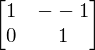

In [37]:
exp(-A2*(θ + h))

$$
\begin{align}
u(t) &=
\begin{pmatrix}
k_1 & k_2
\end{pmatrix}
\begin{pmatrix}
x_1(t) \\
x_2(t)
\end{pmatrix} +
\int_{-h}^0
\begin{pmatrix}
k_1 & k_2
\end{pmatrix}
\begin{pmatrix}
1 & - (\theta  +h) \\
0 & 1
\end{pmatrix}
\begin{pmatrix}
0 \\
1
\end{pmatrix} u(t + \theta) d\theta \\
&= k_1 x_1(t) + k_2 x_2(t) - \int_{-h}^0 k_1 \theta u(t + \theta) d\theta - \int_{-h}^0 k_1 h u(t + \theta) d\theta + \int_{-h}^0 k_2 u(t + \theta) d\theta \\
\end{align}
$$

y al aplicar la transformada de Laplace, tenemos:

$$
u(s) = k_1 x_1(s) + k_2 x_2(s) - h k_1 \frac{e^{-hs}}{s} u(s) + k_1 \frac{1 - e^{-hs}}{s^2} u(s) - h k_1 \frac{1 - e^{-hs}}{s} u(s) + k_2 \frac{1 - e^{-hs}}{s} u(s)
$$

por lo que al pasar a un solo lado todos los terminos de $u(s)$:

$$
\begin{align}
\left[ 1 + h k_1 \frac{e^{-hs}}{s} - k_1 \frac{1 - e^{-hs}}{s^2} + h k_1 \frac{1 - e^{-hs}}{s} - k_2 \frac{1 - e^{-hs}}{s} \right] u(s) &= k_1 x_1(s) + k_2 x_2(s) \\
\left[ 1 + \frac{h k_1 e^{-hs}}{s} - \frac{k_1}{s^2} + \frac{k_1 e^{-hs}}{s^2} + \frac{h k_1}{s} - \frac{h k_1 e^{-hs}}{s} - \frac{k_2}{s} + \frac{k_2 e^{-hs}}{s} \right] u(s) &= k_1 x_1(s) + k_2 x_2(s) \\
\left[ 1  - \frac{k_1}{s^2} + \frac{k_1 e^{-hs}}{s^2} + \frac{h k_1}{s} - \frac{k_2}{s} + \frac{k_2 e^{-hs}}{s} \right] u(s) &= k_1 x_1(s) + k_2 x_2(s) \\
\left[ 1  + \frac{k_1 e^{-hs} - k_1}{s^2} + \frac{h k_1 + k_2 e^{-hs} - k_2}{s} \right] u(s) &= k_1 x_1(s) + k_2 x_2(s)
\end{align}
$$

obtenemos el polinomio caracteristico de la ecuación de control:

$$
1  + \frac{k_1 e^{-hs} - k_1}{s^2} + \frac{h k_1 + k_2 e^{-hs} - k_2}{s}
$$

y al sustituir $s = j \omega$, obtendremos dos ecuaciones, correspondientes a la parte real e imaginaria:

$$
\begin{align}
k_1 \left[ \omega h - \sin{(\omega h)} \right] - k_2 \left[ \omega - \cos{(\omega h)} \right] &= 0 \\
- k_1 \left[ 1 - \cos{(\omega h)} \right] + k_2 \left[ \omega \sin{(\omega h)} \right] - \omega^2 &= 0 \\
\end{align}
$$

por lo que podemos despejar $k_2$ de ambas ecuaciones y obtener:

$$
k_2 = \frac{k_1 \left[ \omega h - \sin{(\omega h)} \right]}{\omega - \cos{(\omega h)}} = \frac{k_1 \left[ 1 - \cos{(\omega h)} \right] + \omega^2}{\omega \sin{(\omega h)}}
$$

y haciendo un poco de algebra, podemos obtener:

$$
\frac{k_1 \left[ \omega h - \sin{(\omega h)} \right]}{\omega - \cos{(\omega h)}} = \frac{k_1 \left[ 1 - \cos{(\omega h)} \right] + \omega^2}{\omega \sin{(\omega h)}}
$$

$$
\frac{k_1 \left[ \omega h - \sin{(\omega h)} \right] \left[ \omega \sin{(\omega h)} \right]}{\omega - \cos{(\omega h)}} - k_1 \left[ 1 - \cos{(\omega h)} \right] = \omega^2
$$

$$
k_1 \frac{\left[ \omega h - \sin{(\omega h)} \right] \left[ \omega \sin{(\omega h)} \right] - \left[ 1 - \cos{(\omega h)} \right] \left[ \omega - \cos{(\omega h)} \right]}{\omega - \cos{(\omega h)}} = \omega^2
$$

$$
k_1 = \frac{\omega^2 \left[ \omega - \cos{(\omega h)} \right]}{\left[ \omega h - \sin{(\omega h)} \right] \left[ \omega \sin{(\omega h)} \right] - \left[ 1 - \cos{(\omega h)} \right] \left[ \omega - \cos{(\omega h)} \right]}
$$

Si sustituimos un punto por debajo de esta curva, $(k_1, k_2) = (0, 0)$, podemos ver que el polinomio caracteristico es trivialmente estable por el criterio de Routh-Hurwitz:

$$
P(s) = 1
$$

por lo que la gráfica de D-particiones para el controlador queda:

In [38]:
def par1(ω, h):
    from numpy import sin, cos
    num = ω**2*(ω - cos(ω*h))
    den = (ω*h - sin(ω*h))*(ω*sin(ω*h)) - (1 - cos(ω*h))*(ω - cos(ω*h))
    return num/den
    
def par2(k1, ω, h):
    from numpy import sin, cos
    num = k1*(ω*h - sin(ω*h))
    den = ω - cos(ω*h)
    return num/den

In [39]:
oms = linspace(-0.22*τ, 0.13*τ, 10000)
k_1 = [par1(om, 1.0) for om in oms]
k_2 = [par2(k1, om, 1.0) for om, k1 in zip(oms, k_1)]

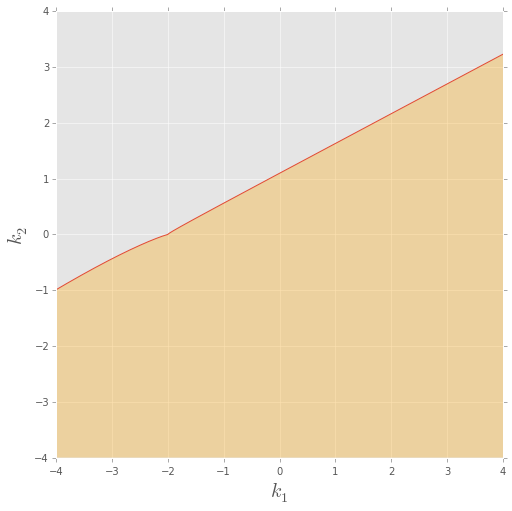

In [40]:
f = figure(figsize=(8, 8))
plot(k_1, k_2)

ax = f.gca()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

ax.fill_between(k_1, -4, k_2, alpha=0.3, facecolor='orange')

ax.set_xlabel(r"$k_1$", fontsize=20)
ax.set_ylabel(r"$k_2$", fontsize=20);

Y el sistema con este controlador será estable para los valores de $k_1$ y $k_2$ escogidos tal que se encuentren en la intersección de estas dos regiones:

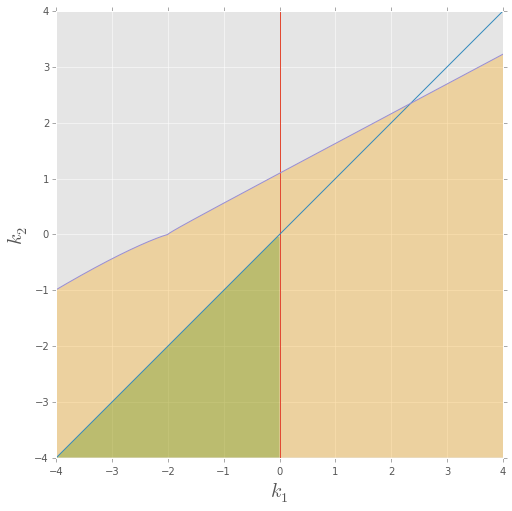

In [41]:
f = figure(figsize=(8, 8))
plot(zeros(len(K_1)), K_1)
plot(K_1, K_2)
plot(k_1, k_2)

ax = f.gca()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

ax.fill_betweenx(K_2, 0, K_1, where=K_1<0, alpha=0.3, facecolor='green')
ax.fill_between(k_1, -4, k_2, alpha=0.3, facecolor='orange')

ax.set_xlabel(r"$k_1$", fontsize=20)
ax.set_ylabel(r"$k_2$", fontsize=20);

Puedes acceder a este notebook a traves de la página

http://bit.ly/1wMAK3L

o escaneando el siguiente código:

![Codigo](codigos/codigo11.jpg)

In [42]:
# Codigo para generar codigo :)
from qrcode import make
img = make("http://bit.ly/1wMAK3L")
img.save("codigos/codigo11.jpg")